# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries + dataset** 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('./data/acetylcholinesterase_bioactivity_3class_pubchem_fp.csv')

## **2. Features**
### **2.1. Input Features**
The ***Acetylcholinesterase*** data set contains 881 input features (Pubchem fingerprints) and 1 output variable (pIC50 values).

In [3]:
# for X (features), only want fingerprints
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8123,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8124,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **2.2. Output features**

In [4]:
# for Y (target), want pIC50
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
8122    4.337242
8123    4.416688
8124    5.767004
8125    5.000000
8126    5.000000
Name: pIC50, Length: 8127, dtype: float64

In [5]:
X.shape

(8127, 881)

In [6]:
Y.shape

(8127,)

### **2.3. Remove low variance features**

Currently shows 881 fp columns; those with low variance are likely not useful as predictors, so we will remove the low variance columns with a default threshold of 10% variance.

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=.1) 
X = selection.fit_transform(X)

In [8]:
X.shape
# greatly reduced number of fp columns

(8127, 213)

## **3. Split Test-Train Data (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# verify dimensions 
X_train.shape, Y_train.shape

((6501, 213), (6501,))

In [11]:
X_test.shape, Y_test.shape

((1626, 213), (1626,))

## **4. Building a Regression Model using Random Forest**

In [12]:
# instantiate, fit, predict
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6788629714931301

In [13]:
Y_pred = model.predict(X_test)

## **5. Scatter Plot of Experimental vs Predicted pIC50 Values**

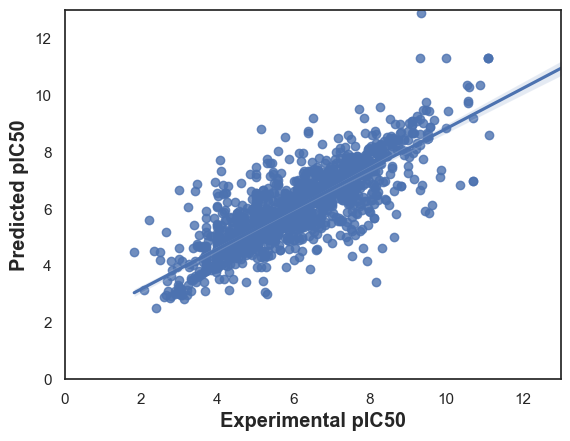

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred)
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
plt.savefig('regression_model_scatter_plot.pdf')
plt.show()